# 7506 - Trabajo Práctico 2

---

## Introducción

### Librerías

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Dataset Train preprocesado
train_ds = pd.read_csv('datasets/tp1-train.csv')
train_ds = train_ds.drop(['Unnamed: 0'], axis=1)
train_ds.head()

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.613560,-58.436845,Caballito,Departamento,4.0,3.0,72.0,72.0,127000.0,RECICLADO A NUEVO!! Hermoso Departamento 4 Amb...
1,-34.608650,-58.408870,Balvanera,Departamento,4.0,3.0,107.0,103.0,165000.0,Departamento 4 Amb c/dep.serv al Frente c/Coch...
2,-34.625915,-58.520649,Versalles,Casa,3.0,2.0,151.0,151.0,155000.0,CASA A RECICLAR - EN VENTA - VERSALLES!
3,-34.582098,-58.448859,Palermo,Departamento,2.0,1.0,55.0,50.0,142298.0,Venta - Newbery Jorge 3445 5º A
4,-34.578438,-58.462492,Villa Ortuzar,Departamento,4.0,3.0,79.0,79.0,167900.0,VENTA DEPARTAMENTO 4 AMBIENTES - VILLA ORTUZAR


In [3]:
# Dataset Test preprocesado
test_ds = pd.read_csv('datasets/tp1-test.csv')
test_ds = test_ds.drop(['Unnamed: 0'], axis=1)
test_ds

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.630964,-58.465666,Flores,Departamento,3.0,2.0,74.0,60.0,115000.0,Departamento 3 ambientes - Flores
1,-34.596589,-58.410986,Palermo,Departamento,3.0,2.0,64.0,57.0,175000.0,PALERMO - Venta - Soler 3200 - 3 Ambientes Lum...
2,-34.596549,-58.403133,Recoleta,Departamento,6.0,4.0,210.0,195.0,530000.0,Recoleta 210 mts 5 amb con dependencia grupo e...
3,-34.619609,-58.400149,San Cristobal,Departamento,1.0,1.0,24.0,24.0,48000.0,VENTA DPTO MONOAMB EN PLANTA BAJA - SAN CRISTOBAL
4,-34.580743,-58.411841,Palermo,Departamento,2.0,1.0,43.0,43.0,145000.0,Departamento - Palermo Chico
...,...,...,...,...,...,...,...,...,...,...
16862,-34.577094,-58.465333,Belgrano,Departamento,5.0,3.0,180.0,140.0,530000.0,"VENTA! Duplex c Parrilla, Pileta y Terraza pr..."
16863,-34.593539,-58.402114,Recoleta,Departamento,6.0,3.0,178.0,163.0,480000.0,ESPECTACULAR DEPARTAMENTO EN VENTA-RETASADO
16864,-34.550719,-58.456377,Nuñez,PH,2.0,1.0,68.0,48.0,136000.0,ph venta nuñez 2 ambientes Patio sin expensa...
16865,-34.603496,-58.379792,San Nicolás,Departamento,1.0,1.0,24.0,24.0,45000.0,Venta de departamento monoambiente en Microcen...


## Procesamiento del lenguaje natural

### Ampliación del dataset

### Modelos

## Redes Neuronales

### Regresión

Predecir el precio de la propiedad y utilizar como métrica de evaluación el error cuadrático medio.

Vamos a predecir el precio de la propiedad (dolares) en base a la superifice total y cubierta. Ya que como vimos en el trabajo pasado, eran los atributos que mas se correlacionaban con el precio.

In [4]:
def plot_regression(modelo,x,y,title="",xlabel="x",ylabel="y"):
    plt.figure()
    
    plt.plot(x,y,"o",label="Valores verdaderos")
    plt.plot(x,modelo.predict(x),"x",label="Valores estimados")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [5]:
## Train
ds_trabajo_train = train_ds.drop(['place_l3', 'property_title'], axis=1)
ds_trabajo_train.head()

,latitud,longitud,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.613560,-58.436845,Departamento,4.0,3.0,72.0,72.0,127000.0
1,-34.608650,-58.408870,Departamento,4.0,3.0,107.0,103.0,165000.0
2,-34.625915,-58.520649,Casa,3.0,2.0,151.0,151.0,155000.0
3,-34.582098,-58.448859,Departamento,2.0,1.0,55.0,50.0,142298.0
4,-34.578438,-58.462492,Departamento,4.0,3.0,79.0,79.0,167900.0


In [6]:
## Test
ds_trabajo_test = test_ds.drop(['place_l3', 'property_title'], axis=1)
ds_trabajo_test.head()

,latitud,longitud,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.630964,-58.465666,Departamento,3.0,2.0,74.0,60.0,115000.0
1,-34.596589,-58.410986,Departamento,3.0,2.0,64.0,57.0,175000.0
2,-34.596549,-58.403133,Departamento,6.0,4.0,210.0,195.0,530000.0
3,-34.619609,-58.400149,Departamento,1.0,1.0,24.0,24.0,48000.0
4,-34.580743,-58.411841,Departamento,2.0,1.0,43.0,43.0,145000.0


In [7]:
ds_trabajo_train.shape

(69662, 8)

In [8]:
## Train

columnas_predictoras = ds_trabajo_train.columns.to_list()
columnas_predictoras.remove('property_price')
columnas_predictoras

['latitud',
 'longitud',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered']

In [9]:
## Test

columnas_predictoras = ds_trabajo_test.columns.to_list()
columnas_predictoras.remove('property_price')
columnas_predictoras

['latitud',
 'longitud',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered']

In [10]:
variable_predictora = "property_surface_total"
# PREGUNATAR: TENEMOS QUE HACER EL SPLIT O SOLAMENTE NOS QUEDAMOS CON LA VARIABLE PREDICTORA DE CADA DATASET?
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_train.loc[:,variable_predictora], ds_trabajo_train.loc[:,variable_predictora], test_size=0.2)

In [11]:
x_train

55068     56.0
14809     33.0
57648    140.0
66827     39.0
14179     27.0
         ...  
37258    112.0
4908      37.0
5190      35.0
19472    129.0
62518     52.0
Name: property_surface_total, Length: 55729, dtype: float64

In [12]:
sscaler = StandardScaler()
sscaler.fit(pd.DataFrame(x_train))

StandardScaler()

In [13]:
x_train_transform = sscaler.transform(pd.DataFrame(x_train))
x_test_transform = sscaler.transform(pd.DataFrame(x_test))

#### Modelo 1

In [14]:
# Creo un modelo Red Neuronal
d_in=1
d_out=1

modelo1 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,))]) #, activation="relu"

In [15]:
modelo1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


 577/1742 [========>.....................] - ETA: 0s

2022-11-15 20:38:17.923454: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1742/1742 [==============================] - 0s 259us/step


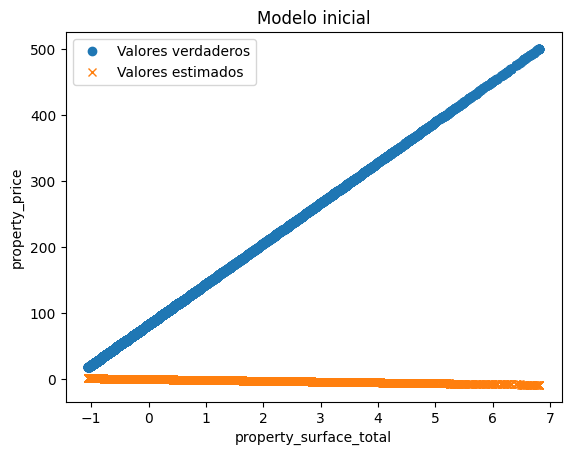

In [16]:
plot_regression(modelo1, x_train_transform, y_train,title = f"Modelo inicial", xlabel="property_surface_total", ylabel="property_price")

In [17]:
modelo1.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  metrics=['mae'], 
)

In [18]:
# Entrenamiento del modelo
modelo1.fit(x_train_transform,y_train,epochs=100,batch_size=16,verbose=False)

Miremos como la red aprendio los datos con los que fue entrenada

1742/1742 [==============================] - 0s 234us/step


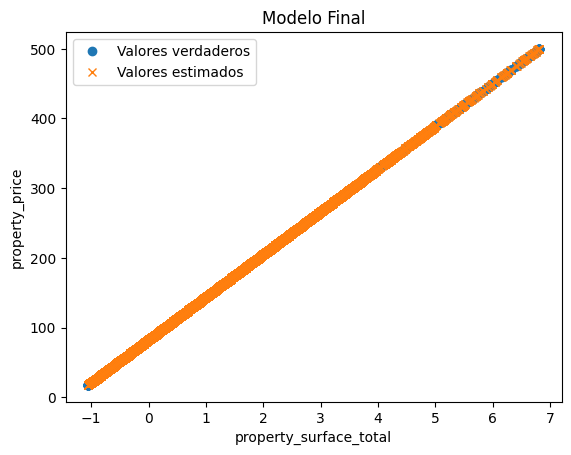

In [19]:
plot_regression(modelo1, x_train_transform, y_train, title = f"Modelo Final",xlabel = "property_surface_total", ylabel="property_price")

Miremos como la red predice

436/436 [==============================] - 0s 230us/step


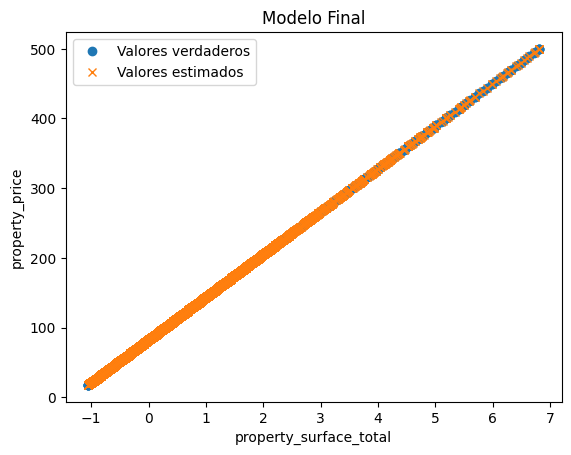

In [20]:
plot_regression(modelo1, x_test_transform, y_test,title = f"Modelo Final", xlabel="property_surface_total", ylabel="property_price")

In [23]:
y_pred_modelo1 = modelo1.predict(x_test_transform)

mae_modelo1 = mean_absolute_error(y_test,y_pred_modelo1)
mse_modelo1 = mean_squared_error(y_test,y_pred_modelo1)

print(f"Error absoluto medio {mae_modelo1}")
print(f"Error cuadrático medio {mse_modelo1}")

436/436 [==============================] - 0s 256us/step
Error absoluto medio 0.0014451747733573172
Error cuadrático medio 2.120458079785534e-06


### Clasificación

#### Construcción del target

#### Modelo

## Ensambles de modelos

### Ensamble 1

### Ensamble 2

## Conclusiones